In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
def read_image(img_name):
    img_bgr = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/"+img_name+".jpg")
    h, w = img_bgr.shape[:2]
    scale = (640 * 480 / (w * h)) ** 0.5
    img_bgr_resize = cv2.resize(img_bgr, dsize=None, fx=scale, fy=scale)
    img_rgb = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)
    return img_rgb, img_gray

In [11]:
img_rgb1, img_gray1 = read_image("penguins1")
img_rgb2, img_gray2 = read_image("akiyoshido")
img_rgb3, img_gray3 = read_image("piramid")
img_rgb4, img_gray4 = read_image("ozu")

# 6-1 画像のフーリエ変換
## 6-1-1 2次元フーリエ変換
---
画像のフーリエ変換は、以下の2次元フーリエ変換が用いられる。  
画像を$f(x,y)$とするとき、そのフーリエ変換$F(u,v)$は以下の式で表される。
$$F(u,v)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x,y)\exp{(-j2\pi(ux+vy))dxdy}$$
$u,v$はそれぞれx,y方向の**空間周波数**であり、フーリエ変換によりx,yで表される空間（**空間領域**）から、  
u,vで表される別の空間（**周波数領域**）の別の形で表現されることになる。  
また、$F(u,v)$は**フーリエ逆変換**により、元の画像$f(x,y)$に戻される。
$$f(u,v)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}F(u,v)\exp{(j2\pi(ux+vy))dudv}$$
$F(u,v)$は複素数であり、絶対値と偏角はそれぞれ
$$
    |F(u,v)|=\sqrt{Re\{F(u,v)\}^2+Im\{F(u,v)\}^2}
$$
$$
    arg\{F(u,v)\}=\tan^{-1}\frac{Im\{F(u,v)\}}{Re\{F(u,v)\}}
$$
と求められる。  
ここで、$Re\{F(u,v)\}$、$Im\{F(u,v)\}$はそれぞれ$F(u,v)$の実部と虚部を表す。  
$|F(u,v)|$は画像の**振幅スペクトル**、$arg\{F(u,v)\}$は**位相スペクトル**と呼ばれ、  
$|F(u,v)|^2$は**パワースペクトル**と呼ばれる。

## 6-1-2 画像のフーリエ変換
---
各画像のフーリエ変換した結果を示す。  
原点は直流成分を表し、元画像のエッジと直交する方向にスペクトルが延びる。

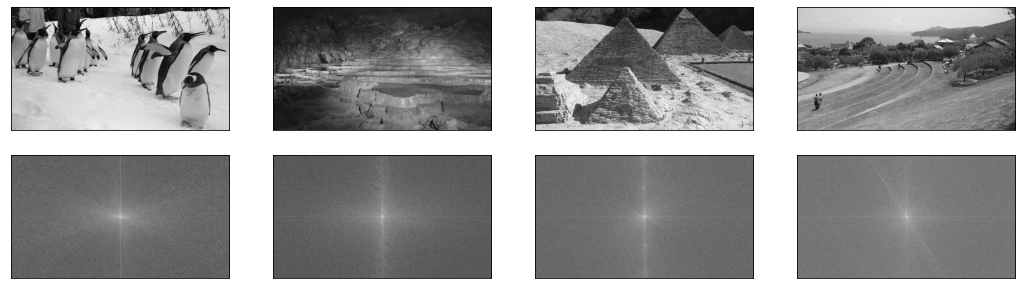

In [31]:
imgs = [img_gray1, img_gray2, img_gray3, img_gray4]

fig, ax = plt.subplots(2, 4, figsize=(18, 5))
for i in range(4):
    dft = cv2.dft(np.float32(imgs[i]), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    """
    numpyによるフーリエ変換
    f = np.fft.fft2(imgs[i])
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    """
    ax[0][i].imshow(imgs[i], 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(magnitude_spectrum, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])

# 6-2 周波数フィルタリング
## 6-2-1 周波数フィルタリング
---
フーリエ変換後の各周波数成分の大きさを各成分毎に変えることにより、元の画像の性質を変化させることができる。  
このような処理を**周波数フィルタリング**と呼ぶ。  
フーリエ変換後の画像を$F(u,v)$、フィルタリングの出力を$G(u,v)$とするとき、周波数フィルタリングは以下の式で表される。  
$$G(u,v)=F(u,v)H(u,v)$$
ここで、$H(u,v)$は周波数フィルタである。  
フィルタリングした結果の画像を見るには$G(u,v)$を逆フーリエ変換を行う。

## 6-2-2 空間フィルタリングと周波数フィルタリングの関係
---
2つの関数$f_{1}(x,y),f_{2}(x,y)$に対し、フーリエ変換は以下に示す性質を持つ。
$$
    F\{f_{1}(x,y)*f_{2}(x,y)\}=F\{f_{1}(x,y)\}F\{f_{2}(x,y)\}
$$
ここで、$F\{\}$はフーリエ変換を表し、$*$は以下で定義される**畳み込み積分**を表す。
$$
    f_{1}(x,y)*f_{2}(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f_{1}(\xi,\eta)f_{2}(x-\xi,y-\eta)d\xi d\eta
$$
この式は、2つの関数の畳み込み積分の結果をフーリエ変換したものは、それぞれの関数のフーリエ変換の籍に等しくなるということを意味している。  
入力画像を$f(x,y)$、フィルタ関数を$h(x,y)$としたとき、$f(x,y)*h(x,y)$は画像の空間フィルタリングを表す。  
  
周波数フィルタリングでは、フーリエ変換とフーリエ逆変換をするため、その分計算時間は余分にかかる。  
一方、空間フィルタリングでは畳み込み積分をするところを、周波数フィルタリングではフィルタ関数との積で済むため、  
この部分では空間フィルタリングの方が時間を要する。  
一般に空間フィルタが小さいときは、空間フィルタリングが有利であり、  
その大きさが大きくなるに従い、周波数フィルタリングが有利になると言える。

# 6-3 ローパスフィルタ、ハイパスフィルタ、バンドパスフィルタ

In [32]:
def make_mask(img, R, inv=False):
    height = img.shape[0]
    width  = img.shape[1]

    center_w = height//2
    center_h = width//2
    
    if inv:
        n = 0
        filter_matrix = np.ones([height, width])
    else:
        n = 1
        filter_matrix = np.zeros([height, width])

    for i in range(0, height):
         for j in range(0, width):
                if (i-center_w)*(i-center_w) + (j-center_h)*(j-center_h) < R*R:
                               filter_matrix[i][j] = n
    
    return filter_matrix

In [34]:
def masked_fft(img, mask):
    dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)*mask

    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    
    dft2 = cv2.dft(np.float32(img_back),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift2 = np.fft.fftshift(dft2)

    magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
    
    return magnitude_spectrum, img_back, magnitude_spectrum2

In [35]:
def make_Gauss_mask(x):
    X = np.matrix(x).T
    x_mu = X - mu

    w1 = np.matmul(inv_sig, x_mu)
    w2 = -0.5 * np.matmul(x_mu.T, w1)

    N = 1/(np.sqrt(((2*np.pi)**2) * np.abs(det))) * np.exp(w2)
    return N[0,0]

In [56]:
x1_range = img_gray1.shape[1] // 2
x2_range = img_gray1.shape[0] // 2

x1 = np.arange(-x1_range, x1_range+1)
x2 = np.arange(-x2_range, x2_range)

sigmas = [100, 900, 1600]
M=[0, 0]
mu = np.matrix(M).T

g_masks = []

for i in range(3):
    S=[[sigmas[i],0],[0,sigmas[i]]]
    sigma = np.matrix(S)
    inv_sig = np.linalg.inv(sigma)
    det = np.linalg.det(sigma)
    
    g2 = np.array([[make_Gauss_mask([i, j]) for i in x1] for j in x2])
    g2 *= 1/g2.max()
    g2 = np.array([g2, g2]).transpose(1, 2, 0)
    
    g_masks.append(g2)

## 6-3-1 ローパスフィルタ
---
低周波数成分は残し、高周波数成分は除去するようなフィルタを**ローパスフィルタ**と呼ぶ。  
結果としては平滑化された画像が得られる。遮断周波数が小さくなるほどより強く平滑化される。

<ipython-input-34-3c03945b798d>:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


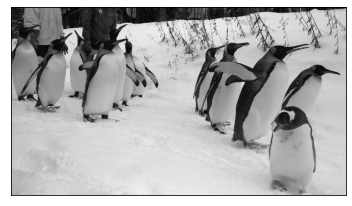

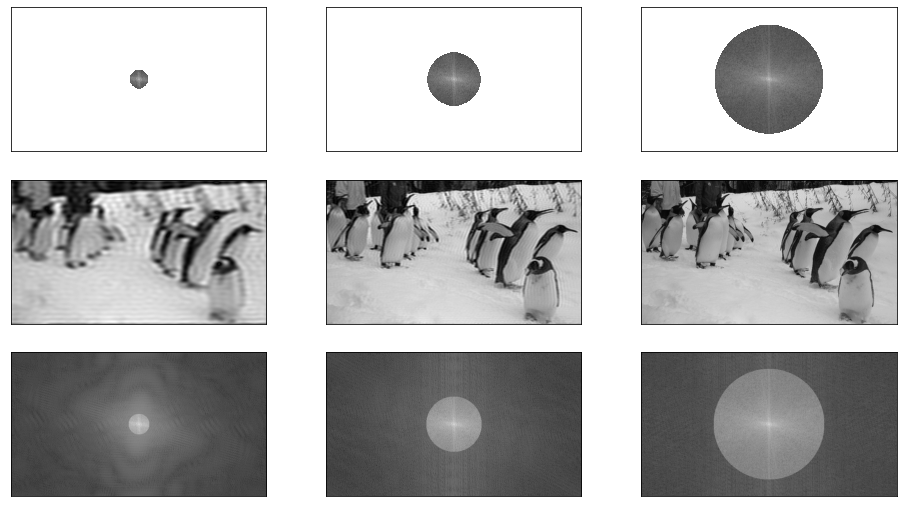

In [39]:
masks = np.array([np.array([make_mask(img_gray1, r), make_mask(img_gray1, r)]).transpose(1, 2, 0) for r in [30, 80, 160]])

plt.imshow(img_gray1, 'gray');
plt.xticks([]);
plt.yticks([]);

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, masks[i])
    ax[0][i].imshow(spectrum_img1, 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

### ガウス分布型のローパスフィルタ
ガウス分布に従うローパスフィルタを用いた場合の結果を示す。  
上の結果では不自然な縞模様が表れている。一方ガウス分布型ではより滑らかで自然な平滑化となっている。

<ipython-input-34-3c03945b798d>:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
<ipython-input-34-3c03945b798d>:14: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))


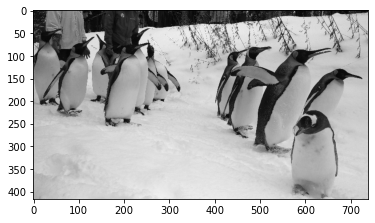

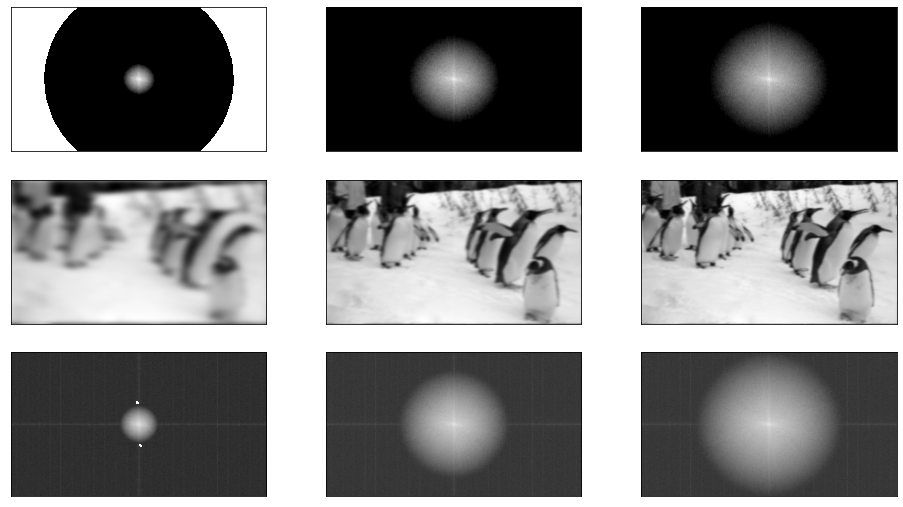

In [67]:
plt.imshow(img_gray1, 'gray')

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, g_masks[i])
    ax[0][i].imshow(spectrum_img1, 'gray', vmin=0, vmax=300)
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

## 6-3-2 空間フィルタリングによる平滑化との関係
---
ガウシアンフィルタ
$$
    h_{g}(x,y) = \frac{1}{2\pi\sigma^2}\exp{(-\frac{x^2+y^2}{2\sigma^2})}
$$
のフーリエ変換は
$$
    H_{g}(u,v)=\exp{(-2\pi^2\sigma^2(u^2+v^2))}
$$
と計算される。ガウス分布のフーリエ変換はガウス分布となる。  
空間領域におけるガウシアンフィルタとガウス分布型のローパスフィルタは本質的に同じものである。  
さらに、$h_{g}(x,y)$と$H_{g}(u,v)$の幅は反比例の関係にある。
  
次に平均化フィルタについて考える。  
平均化フィルタは以下のように表される。
$$
    h_{ave}(x,y)=\frac{1}{w^2}rect(\frac{x}{w}, \frac{y}{w})
$$
ただし、
$$
    rect(x, y)= \begin{cases}
        1 & (|x|\leq\frac{1}{2}かつ|y|\leq\frac{1}{2}) \\
        0 & (それ以外)
    \end{cases}
$$
そして$h_{ave}(x,y)$のフーリエ変換は以下のように計算される。
$$
    H_{ave}(u,v)=\frac{\sin{\pi wu}}{\pi wu}\frac{\sin{\pi wv}}{\pi wv}
$$
振幅スペクトルは周波数が高くなるにつれて小さくなるため、ローパスフィルタの性質を持つと言える。

## 6-3-3 ハイパスフィルタ
---
高周波数成分は残し、低周波数成分は除去するようなフィルタを**ハイパスフィルタ**と呼ぶ。  
ハイパスフィルタは以下の式より、ローパスフィルタから作ることもできる。
$$H_{high}(u,v)=1-H_{low}(u,v)$$

<ipython-input-34-3c03945b798d>:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


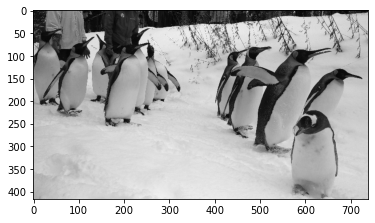

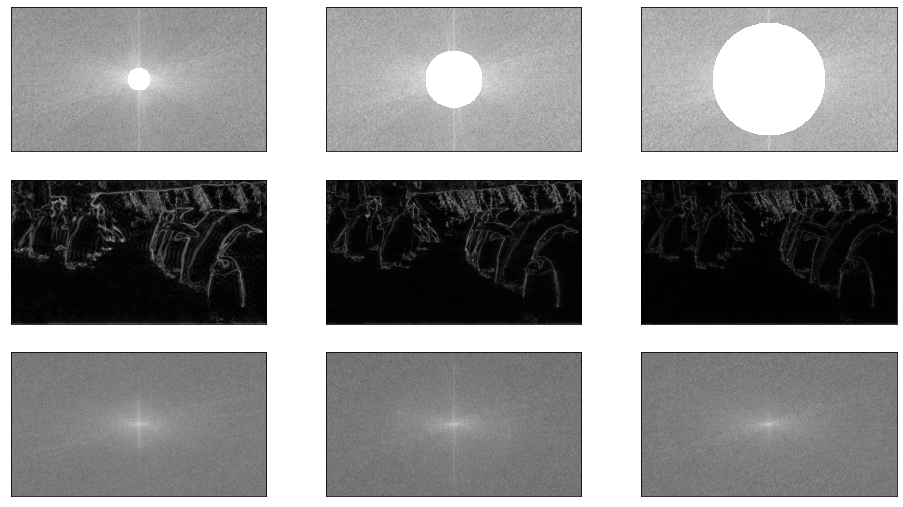

In [69]:
masks_i = np.array([np.array([make_mask(img_gray1, r, True), make_mask(img_gray1, r, True)]).transpose(1, 2, 0) for r in [30, 80, 160]])

plt.imshow(img_gray1, 'gray')

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, masks_i[i])
    ax[0][i].imshow(spectrum_img1, 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

### ガウス分布型のハイパスフィルタ

<ipython-input-34-3c03945b798d>:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


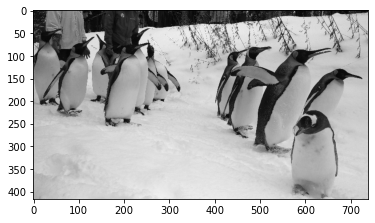

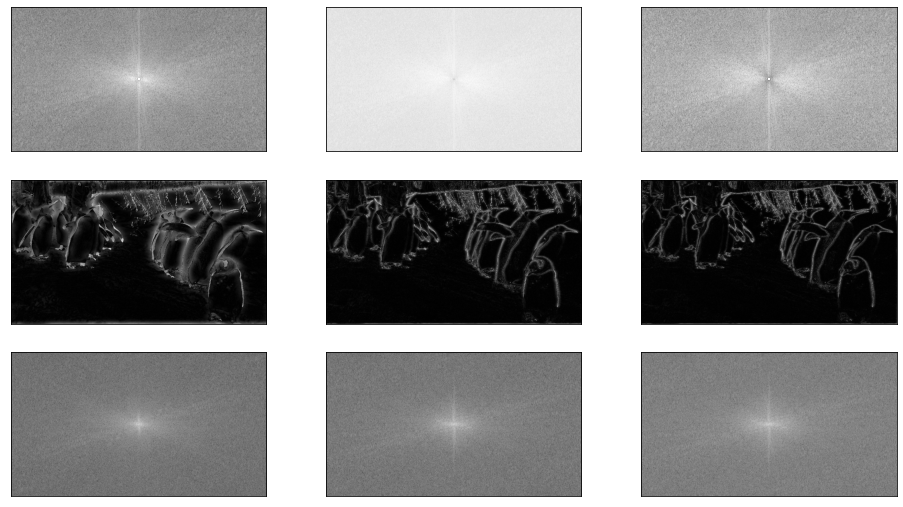

In [70]:
plt.imshow(img_gray1, 'gray')

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, 1-g_masks[i])
    ax[0][i].imshow(spectrum_img1, 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

## 6-3-4 バンドパスフィルタ
---
中間的な周波数の範囲を残すようなものを**バンドパスフィルタ**と呼ぶ。

In [71]:
masks_1 = np.array([np.array([make_mask(img_gray1, r), make_mask(img_gray1, r)]).transpose(1, 2, 0) for r in [30, 50, 100]])
masks_2 = np.array([np.array([make_mask(img_gray1, r), make_mask(img_gray1, r)]).transpose(1, 2, 0) for r in [50, 100, 180]])
mask_diff = masks_2 - masks_1

<ipython-input-34-3c03945b798d>:5: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


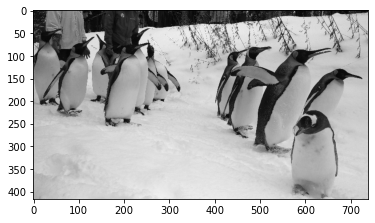

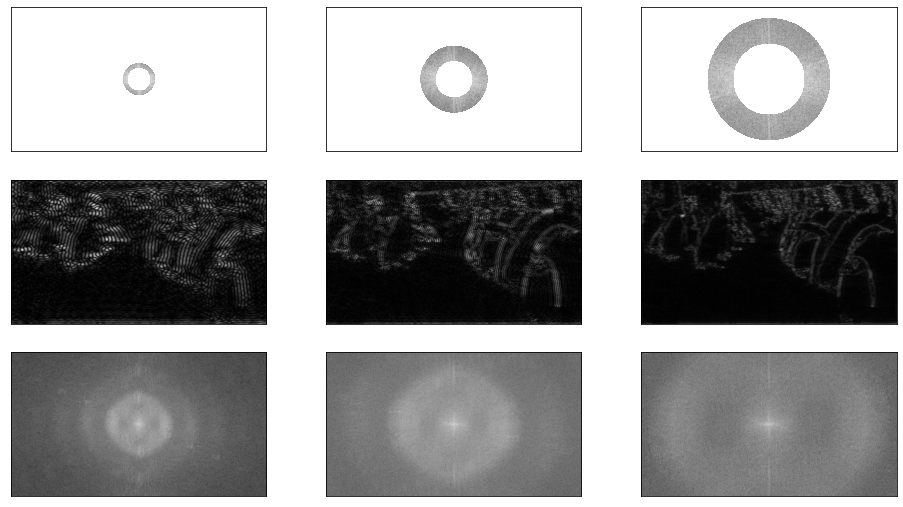

In [72]:
plt.imshow(img_gray1, 'gray')

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, mask_diff[i])
    ax[0][i].imshow(spectrum_img1, 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

# 6-4 高域強調フィルタ
## 6-4-1 高域強調フィルタ
---
ハイパスフィルタは直流成分を含む低周波数成分を除去してしまう。  
低周波数成分を保ちつつ、高周波数成分を強調するフィルタを**高域強調フィルタ**と呼ぶ。  
エッジが強調され、鮮鋭化された画像が得られる。

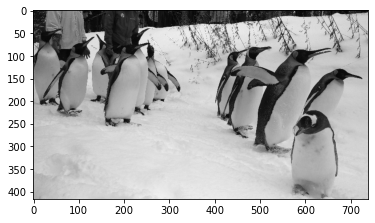

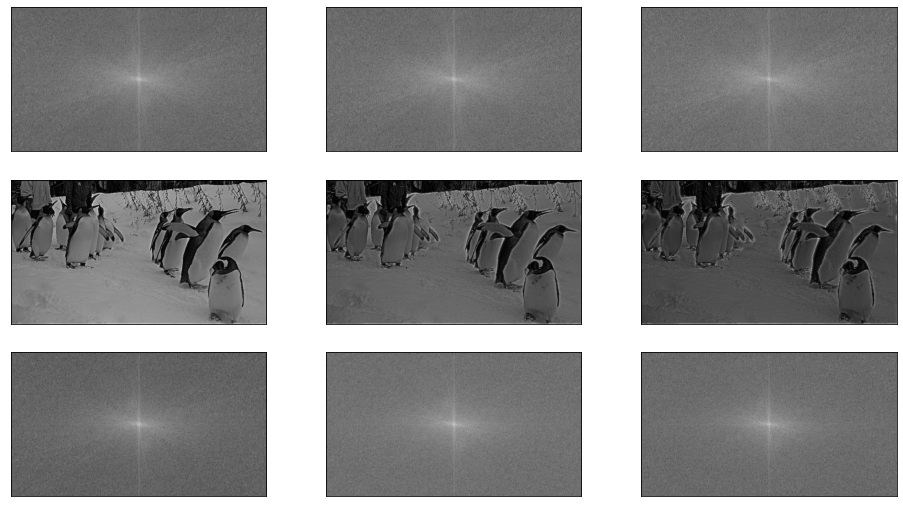

In [73]:
plt.imshow(img_gray1, 'gray')

K = [1, 2, 3]

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    spectrum_img1, img_ifft, spectrum_img2 = masked_fft(img_gray1, K[i]+1-K[i]*g_masks[1])
    ax[0][i].imshow(spectrum_img1, 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].imshow(img_ifft, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    ax[2][i].imshow(spectrum_img2, 'gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])

## 6-4-2 空間フィルタリングによる鮮鋭化との関係
---
アンシャープマスキングと等価である。